# Polynomial Regression - 다항 회귀

공부 시간에 따른 시험 점수 (우등생 데이터)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:,:-1].values # 처음부터 마지막 컬럼 직전까지의 데이터(독립변수)
y = dataset.iloc[:, -1].values # 처음부터 마지막 컬럼까지(종속변수)

dataset

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6
5,2.4,14
6,2.5,10
7,2.6,12
8,2.9,24
9,3.1,26


# 단순 선형 회귀

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체 생성
reg.fit(X, y) # 전체 데이터로 학습 -> 회귀 모델 생성

LinearRegression()

## 데이터 시각화 작업

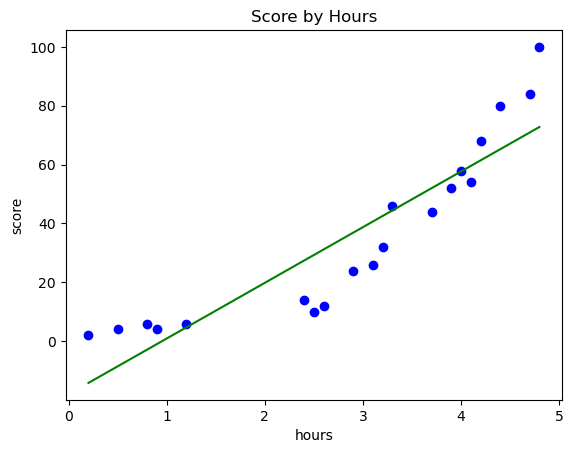

In [6]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, reg.predict(X), color='green') # 선 그래프
plt.title('Score by Hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [7]:
reg.score(X, y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 다항 회귀

In [8]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) # 2차 방정식 객체 생성
X_poly = poly_reg.fit_transform(X) # 피처 확장 부분
X_poly[:5]

array([[1.  , 0.2 , 0.04],
       [1.  , 0.5 , 0.25],
       [1.  , 0.8 , 0.64],
       [1.  , 0.9 , 0.81],
       [1.  , 1.2 , 1.44]])

In [9]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [10]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2'], dtype=object)

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) # 변한된 x와 y를 가지고 모델 생성 [ 학습 ]

LinearRegression()

## 데이터 시각화 (변환된 X와 y)

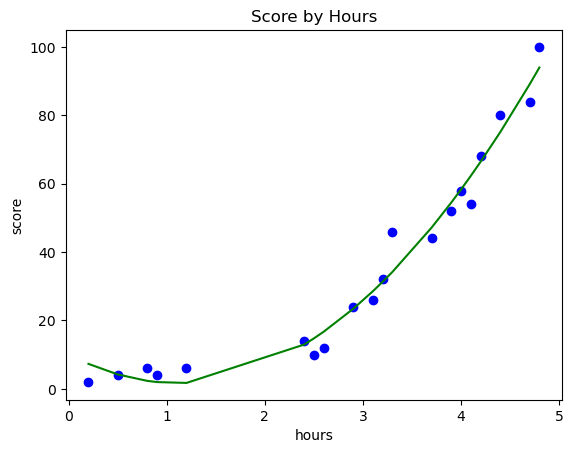

In [13]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='green') # 선 그래프
plt.title('Score by Hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [14]:
X_range = np.arange(min(X), max(X), 0.1) # X의 최소값에서 X의 최대값까지의 범위를 0.1 단위로 잘라서 데이터를 생성
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [15]:
X_range.shape # 데이터 개수

(46,)

In [16]:
X.shape

(20, 1)

In [18]:
X_range = X_range.reshape(-1,1) # row 개수는 자동으로 계산, column 개수는 한개로
X_range.shape

(46, 1)

In [19]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

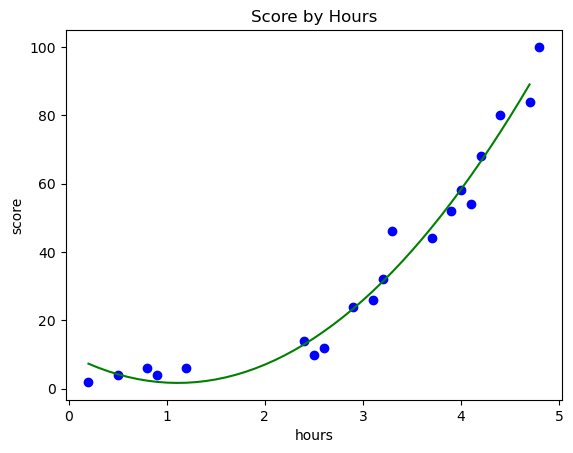

In [21]:
plt.scatter(X, y, color='blue') # 산점도
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color='green') # 선 그래프
plt.title('Score by Hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()


## 공부 시간에 따른 시험 성적 예측

In [22]:
reg.predict([[2]])

array([19.85348988])

In [23]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 다항 선형 회귀

array([7.05092142])

In [24]:
lin_reg.score(X_poly, y) # 다항 회귀 모델 평가

0.9755457185555199